# Problem :- to find out species of tree for given tree features


In [77]:
# importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [78]:
# loading Data 
data = pd.read_csv(r'C:\Users\Tuhin\OneDrive\Desktop\BIA PROJECT\iris.csv')

In [79]:
#Checking data properties
df = data.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
# for Statistic View
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [82]:
# check unique values in target columns
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [83]:
# Null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [84]:
# Checking Duplicate
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [85]:
# Remove Duplicates
df = df.drop_duplicates(subset=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [86]:
#To Reset the Index After Dropping:

df = df.drop_duplicates().reset_index(drop=True)

In [87]:
# Again Checking Duplicate
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


In [88]:
#To change datatype of species from string to number
df['species'] = df['species'].astype('category').cat.codes

In [89]:
#To see the actual mapping
mapping = dict(enumerate(df['species'].astype('category').cat.categories))
print(mapping)

{0: 0, 1: 1, 2: 2}


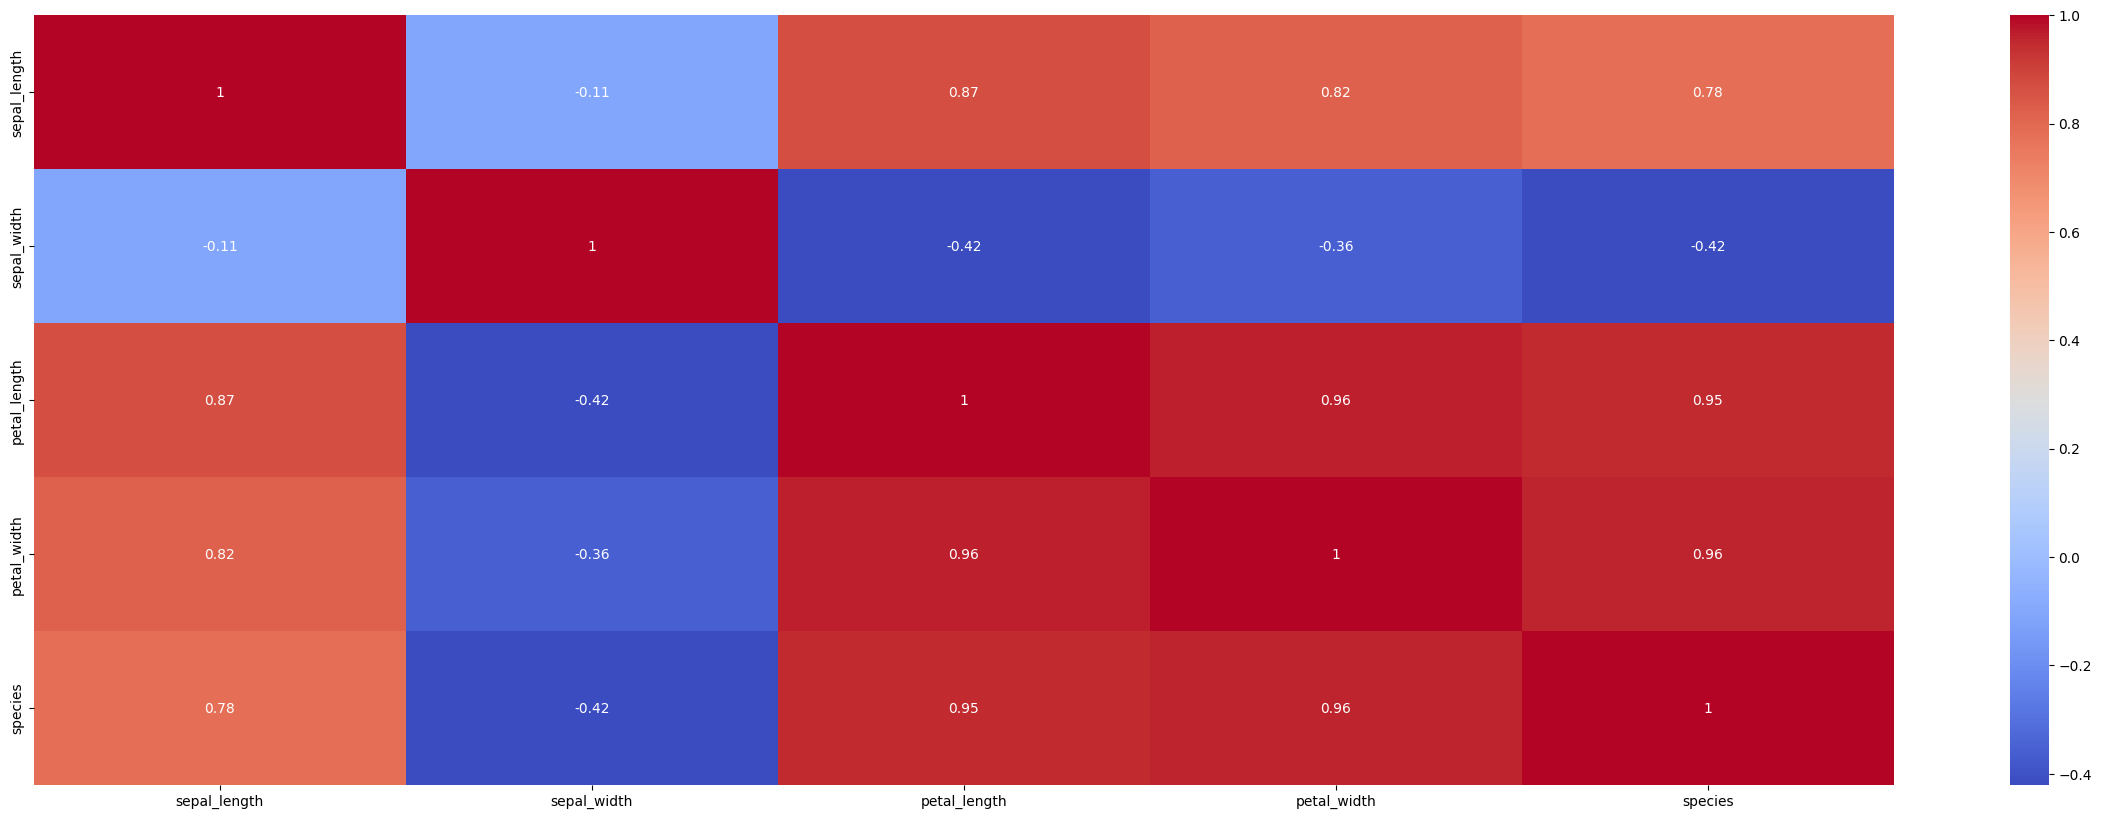

In [90]:
#Correlation

plt.figure(figsize = (30,10))
sns.heatmap(df.corr() , cmap = 'coolwarm' , annot = True)
plt.show()

In [91]:
# Setting Feature and Target

X = df.drop(columns = ['species'], axis = 1)
y = df['species']


In [92]:
#Split dataset 
X_train, X_test , y_train , y_test = train_test_split( X , y , test_size = 0.25 , random_state = 42)

In [93]:
# Data Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# Model Building & Training
model = LogisticRegression()

#Training the model 
model.fit(X_train_scaled , y_train)

LogisticRegression()

In [95]:
# Prediction and Accuracy

y_predict = model.predict(X_test_scaled)
df_predict = pd.DataFrame({'Actual': y_test , 'Predicted': y_predict})
df_predict.head(10)

,Actual,Predicted
125,2,2
51,1,1
138,2,2
19,0,0
104,2,2
12,0,0
76,1,1
31,0,0
81,1,2
9,0,0


In [96]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_predict)
confusion = metrics.confusion_matrix(y_test, y_predict)
f1 = metrics.f1_score(y_test, y_predict, average='weighted')  # or 'macro' or 'micro'
classification_report = metrics.classification_report(y_test, y_predict)

In [99]:
print(f'"Accuracy:", {accuracy:.2f}')
print()
print("Confusion Matrix:\n", confusion)
print()
print(f'"F1 Score:", {f1:.2f}')
print()
print("Classification Report:\n", classification_report)


"Accuracy:", 0.97

Confusion Matrix:
 [[14  0  0]
 [ 0  9  1]
 [ 0  0 13]]

"F1 Score:", 0.97

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.90      0.95        10
           2       0.93      1.00      0.96        13

    accuracy                           0.97        37
   macro avg       0.98      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37

